In [1]:
import tensorflow as tf

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras import optimizers

import pandas as pd
import numpy as np

from keras.backend.tensorflow_backend import set_session
import tensorflow as tf
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True  # dynamically grow the memory used on the GPU
config.log_device_placement = True  # to log device placement (on which device the operation ran)
sess = tf.compat.v1.Session(config=config)
tf.compat.v1.keras.backend.set_session(sess)

import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

from matplotlib import pyplot as plt
import seaborn as sns

Using TensorFlow backend.


Device mapping:
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: GeForce GTX 1050 Ti, pci bus id: 0000:01:00.0, compute capability: 6.1



In [2]:
df1 = pd.read_csv('Renewable and non renewable data.csv')
df1=df1[df1.Nuclear != '-']

In [3]:
df1.head()

,Million tonnes oil equivalent,Natural MTO,OIL,Coal,Nuclear,Hydro,Unnamed: 6,CO2,GDP Constant,GDPPC
4,1969,0.4,19.6,39.6,0.2,6.5,NaN,197.9,6.539700,4.269852
5,1970,0.5,19.5,37.6,0.3,6.9,NaN,190.3,5.157230,2.864363
6,1971,0.6,20.9,38.1,0.2,7.6,NaN,207.0,1.642930,-0.626351
7,1972,0.6,22.6,40.2,0.2,7.3,NaN,219.2,-0.553301,-2.815629
8,1973,0.6,23.8,39.7,0.4,7.8,NaN,219.7,3.295521,0.919174


In [4]:
# Y_Actual_GDP = df1['GDP Constant ']
# Y_Actual_PC = df1['GDPPC']
Y_Actual_CO2 = df1['CO2']

In [5]:
X_Ren = df1[['Natural MTO','OIL','Coal']]
X_Non = df1[['Nuclear','Hydro']]

In [6]:
print(X_Ren.head())
print(X_Non.head())

   Natural MTO   OIL  Coal
4          0.4  19.6  39.6
5          0.5  19.5  37.6
6          0.6  20.9  38.1
7          0.6  22.6  40.2
8          0.6  23.8  39.7
  Nuclear  Hydro
4     0.2    6.5
5     0.3    6.9
6     0.2    7.6
7     0.2    7.3
8     0.4    7.8


In [7]:
#Conventions Used in Models 1. Non-Ren GDP 2. Non-Ren PC 3. Ren GDP 4. Ren PC

In [8]:
# MODEL 1 Starting
# X_train_1, X_test_1, y_train_1, y_test_1 =train_test_split(X_Ren,Y_Actual_PC,test_size=.3)
# X_train_1, X_test_1, y_train_1, y_test_1 =train_test_split(X_Ren,Y_Actual_CO2,test_size=.3,random_state = 40)
# X_train_1 = preprocessing.scale(X_train_1)
# X_test_1 = preprocessing.scale(X_test_1)

In [9]:
# LR = [.1,0.5]
# LR = [.1,1,10,100]

In [10]:
plt.close('all')

In [11]:
X_train_1, X_test_1, y_train_1, y_test_1 =train_test_split(X_Ren,Y_Actual_CO2,test_size=.3,random_state = 40)
X_train_1 = preprocessing.scale(X_train_1)
X_test_1 = preprocessing.scale(X_test_1)
LR=100
model_1 = Sequential()
model_1.add(Dense(1, input_shape=(3,),activation='relu'))
#     model_1.add(Dense(128,activation='relu'))
# model_1.add(Dense(1,))
# model_1.add(Dense(1, kernel_initializer='normal'))
# model_1.compile(Adam(lr=100), 'mean_squared_error')
model_1.compile(Adam(lr=100), 'mean_absolute_error')
# model_1.compile(loss='mean_squared_error', optimizer='adam')

history = model_1.fit(X_train_1,y_train_1,epochs = 40,validation_split = 0.1,verbose = 0)
#     history_dict = history.history

#     loss_values = history_dict['loss']
#     val_loss_values = history_dict['val_loss']
#     plt.figure()
#     plt.plot(loss_values,'bo',label='training loss')
#     plt.plot(val_loss_values,'r',label='val_training_loss')

y_train_pred_1 = model_1.predict(X_train_1)
y_test_pred_1 = model_1.predict(X_test_1)
print(r2_score(y_train_1,y_train_pred_1))
print(r2_score(y_test_1,y_test_pred_1))

0.9980302871926298
0.9773204549030697


In [12]:
plt.close('all')
plt.show()

In [13]:
mean_squared_error(y_train_1,y_train_pred_1)

774.4130519801565

Text(0.5, 1.0, 'Test')

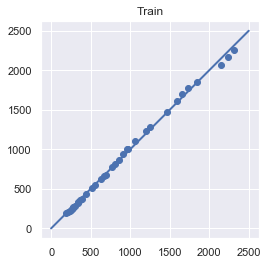

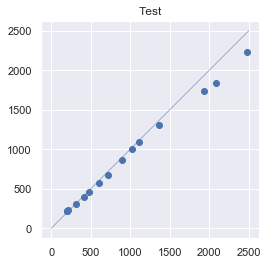

In [14]:
x=np.linspace(0,2500,100)
y=x
plt.close('all')
sns.set()
plt.figure()
ax = plt.gca()
ax.set_aspect(1)
# plt.plot(y_train_1,y_train_pred_1,'bo')
plt.plot(y_train_1,y_train_pred_1,'bo')
plt.plot(x, y, linewidth=2.0)
plt.title('Train')

plt.figure()
ax = plt.gca()
ax.set_aspect(1)
plt.plot(y_test_1,y_test_pred_1,'bo')
plt.plot(x, y, linewidth=.50)
plt.title('Test')

In [15]:
plt.show()

In [16]:
y_train_1=y_train_1.reset_index()['CO2']

In [17]:
y_train_pred_1.max()

2256.4893

In [18]:
# df4=pd.merge(y_train_1,y_train_pred_1)
# type(y_train_pred_1)
# np_array = np.random.randn(5)
# print(y_train_pred_1)
y_train_pred_1=y_train_pred_1.reshape(35,)
# y_train_pred_1.resize(5,1)
# np_array.shape
df5=pd.Series(data = y_train_pred_1,name='Predicted')
# print(type(df5),type(y_train_1))
df6=pd.merge(y_train_1,df5,left_index=True, right_index=True)
# sns.regplot(x="total_bill", y="tip", data=tips);

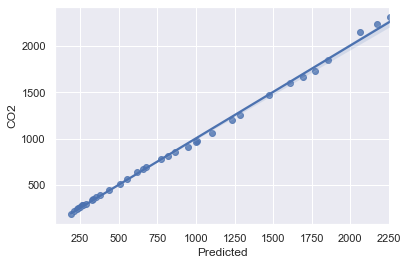

In [19]:
plt.close('all')
# sns.set(color_codes=True)
sns.regplot(x="Predicted", y="CO2", data=df6);
plt.show()

In [20]:
# MODEL 2 Starts
# for i in range(1,100):
X_train_1, X_test_1, y_train_1, y_test_1 =train_test_split(X_Ren,Y_Actual_CO2,test_size=.3,random_state = 44)
X_train_1 = preprocessing.scale(X_train_1)
X_test_1 = preprocessing.scale(X_test_1)
model_1 = Sequential()
model_1.add(Dense(1, input_shape=(3,),activation='relu'))
#     model_1.add(Dense(128,activation='relu'))
# model_1.add(Dense(1,))
# model_1.add(Dense(1, kernel_initializer='normal'))
# model_1.compile(Adam(lr=100), 'mean_squared_error')
sgd = optimizers.SGD(lr=100)
model_1.compile(optimizer=sgd, loss='mean_absolute_error')
# model_1.compile(loss='mean_squared_error', optimizer='adam')

history = model_1.fit(X_train_1,y_train_1,epochs = 40,validation_split = 0.1,verbose = 0)
#     history_dict = history.history

#     loss_values = history_dict['loss']
#     val_loss_values = history_dict['val_loss']
#     plt.figure()
#     plt.plot(loss_values,'bo',label='training loss')
#     plt.plot(val_loss_values,'r',label='val_training_loss')

y_train_pred_1 = model_1.predict(X_train_1)
y_test_pred_1 = model_1.predict(X_test_1)
print(r2_score(y_train_1,y_train_pred_1))
print(r2_score(y_test_1,y_test_pred_1))

0.9581786572976593
0.902633363948914


In [21]:
y_train_pred_1.max()

2577.8647

Text(0.5, 1.0, 'Test')

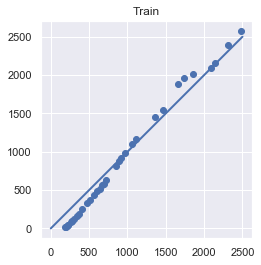

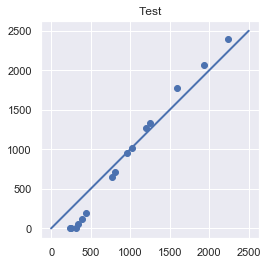

In [22]:
x=np.linspace(0,2500,100)
y=x
plt.close('all')
sns.set()
plt.figure()
ax = plt.gca()
ax.set_aspect(1)
# plt.plot(y_train_1,y_train_pred_1,'bo')
plt.plot(y_train_1,y_train_pred_1,'bo')
plt.plot(x, y, linewidth=2.0)
plt.title('Train')

plt.figure()
ax = plt.gca()
ax.set_aspect(1)
plt.plot(y_test_1,y_test_pred_1,'bo')
plt.plot(x, y, linewidth=2.0)
plt.title('Test')

In [23]:
plt.show()

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
model = LinearRegression()

In [26]:
model.fit(X_train_1,y_train_1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [27]:
model.score(X_test_1,y_test_1)

0.9870256772043021

In [28]:
model.score(X_train_1,y_train_1)

0.9999674191879566